<a href="https://colab.research.google.com/github/dachendachen/2020_Stats/blob/master/nonp_and_parametric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Wasserman 9.9**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

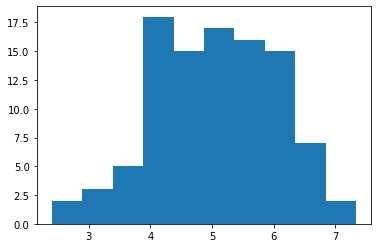

In [6]:
# X1, ..., Xn ~ Normal(mu, 1)
# mu =5, variance=1, sigma= se= 1; n = 100 observation

#initialize 100 observation
data = np.random.normal(5,1,100)
plt.hist(data);

In [11]:
# mu = mean of data
data_mean= np.mean(data)
print(data_mean)

5.059067970340087


### **Non-parametric Bootstrapping:**


In [0]:
B = 10000 #loop ten thousand times
theta_boot = np.zeros(B)

# know the function, theta = e^mu
for i in range(B):
  boot_data = np.random.choice(data, 100, replace=True)
  theta_boot[i] = np.exp(mu_boot[i])

#mu_boot, 10000 samples generated from the given data

mean_theta_boot = np.mean(theta_boot)
var_theta_boot = np.var(theta_boot)
se_theta_boot = np.sqrt(var_theta_boot)


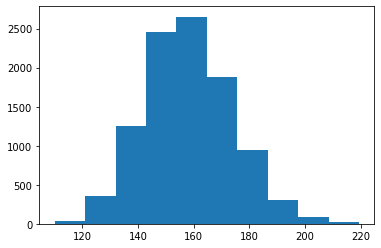

In [34]:
plt.hist(theta_boot);

In [0]:
# .95 confidence interval
# 1-alpha = .95
# alpha = 0.025
# Z_alpha/2 = 1.96

In [24]:
CI_95_negative = mean_theta_boot - 1.96*se_theta_boot
CI_95_positive = mean_theta_boot + 1.96*se_theta_boot

print(CI_95_negative)
print(CI_95_positive)

127.43850523021518
188.9713549875463


In [31]:
#another way
print(np.quantile(theta_boot, 0.025))
print(np.quantile(theta_boot, 0.975))

129.6532506849589
190.55290773567035


### **Parametric Bootstrapping**

In [0]:
#Decided the parameters:
# mu: original data set mean
# variance: original data set variance

#data_mean= np.mean(data)
# variance is given, 1

#use these information construct a NEW Normal Distribution

In [0]:
#start resampling
B = 10000 # num of loop
theta_bootp = np.zeros(B)

for j in range(B):
  pboot_data = np.random.normal(data_mean, 1, size = 100)
  theta_bootp[j] = np.exp(np.mean(pboot_data))
#finished resampling

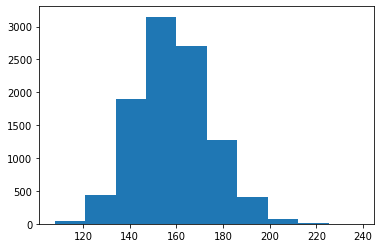

In [28]:
plt.hist(theta_bootp);

In [32]:
#calculating the Confidence Interval manually
var_theta_bootp = np.var(theta_bootp)
se_theta_bootp = np.sqrt(var_theta_bootp)

p_CI_95_neg = np.mean(theta_bootp) - 1.96*se_theta_bootp
p_CI_95_pos = np.mean(theta_bootp) + 1.96*se_theta_bootp

print(p_CI_95_neg)
print(p_CI_95_pos)

127.04206979933629
189.37780289318962


In [29]:
#calculate the .95 confidence interval using built-in function
CI_95_1 = np.quantile(theta_bootp, 0.025) 
CI_95_2 = np.quantile(theta_bootp, 0.975)

print(CI_95_1)
print(CI_95_2)

129.92404797649587
192.26587134164944
